Nombre total d'itérations effectuées : 37


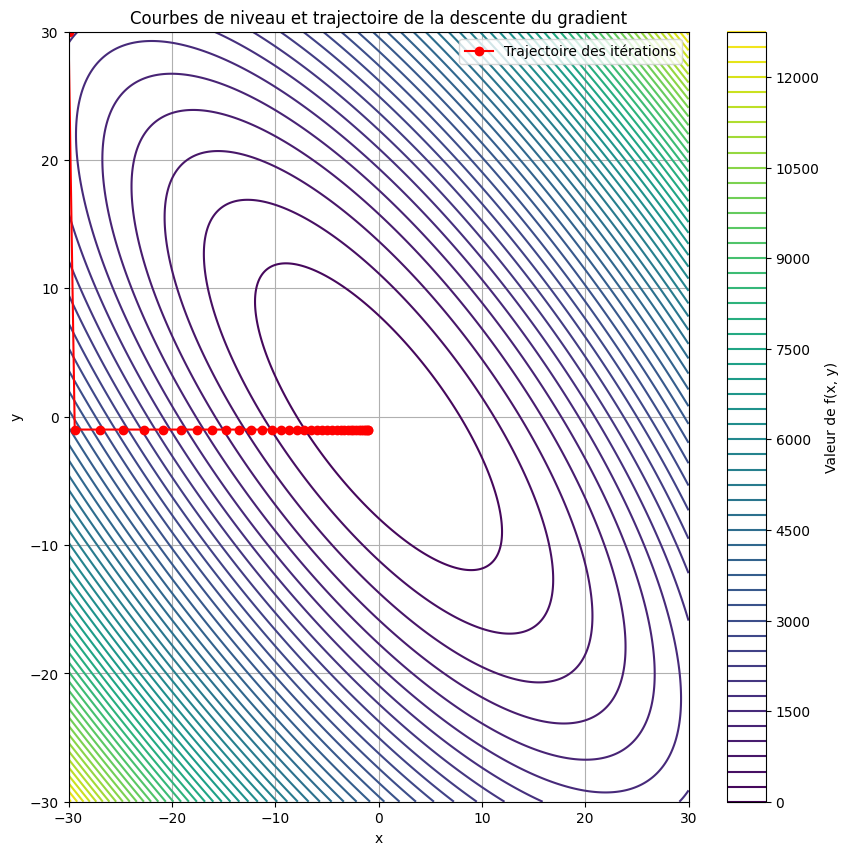

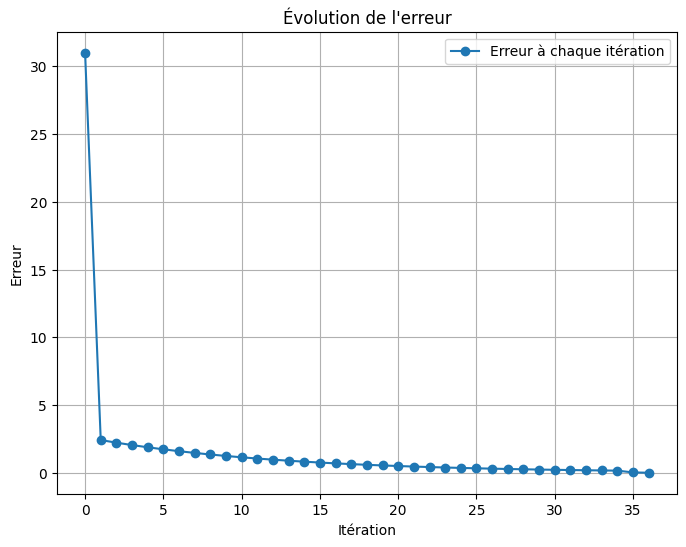

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    """
    Fonction à minimiser : f(x, y) = 4x^2 + 6xy + 4y^2
    """
    return 4 * x**2 + 6 * x * y + 4 * y**2

def gradient(x, y):
    """
    Gradient de f(x, y).
    """
    df_dx = 8 * x + 6 * y
    df_dy = 6 * x + 8 * y
    return np.array([df_dx, df_dy])

def projection_on_K(x, y):
    """
    Projette le point (x, y) sur le domaine K = {(x, y) : x >= -1, y >= -1, x <= 1, y <= 1}.
    """
    x_proj = min(x, -1)
    y_proj = min(y, -1)
    return np.array([x_proj, y_proj])

def gradient_descent_fixed_step_projection(initial_point, learning_rate, max_iter, error_threshold):
    """
    Méthode de descente du gradient à pas fixe avec projection sur K.
    
    Parameters:
    - initial_point: Point initial (x0, y0).
    - learning_rate: Pas d'apprentissage (alpha).
    - max_iter: Nombre maximum d'itérations.
    - error_threshold: Seuil d'arrêt basé sur la différence entre x_new et x_old.

    Returns:
    - points: Liste des points générés pendant l'optimisation.
    - values: Liste des valeurs de la fonction objectif.
    - errors: Liste des erreurs à chaque itération.
    - num_iterations: Nombre total d'itérations effectuées.
    """
    x, y = initial_point
    points = [np.array([x, y])]
    values = [f(x, y)]
    errors = []

    for i in range(max_iter):
        grad = gradient(x, y)
        x_new, y_new = np.array([x, y]) - learning_rate * grad
        x_proj, y_proj = projection_on_K(x_new, y_new)

        error = np.linalg.norm(np.array([x_proj, y_proj]) - np.array([x, y]))
        errors.append(error)

        if error < error_threshold:
            return points, values, errors, i + 1

        points.append(np.array([x_proj, y_proj]))
        values.append(f(x_proj, y_proj))

        # Mise à jour du point courant
        x, y = x_proj, y_proj

    return points, values, errors, max_iter

# Paramètres de l'algorithme
initial_point = np.array([-30, 30])  # Point initial
learning_rate = 0.01                  # Pas d'apprentissage
max_iter = 50                         # Nombre maximum d'itérations
error_threshold = 1e-6                # Seuil d'erreur

# Exécution de l'algorithme
points, values, errors, num_iterations = gradient_descent_fixed_step_projection(initial_point, learning_rate, max_iter, error_threshold)

# # Affichage des résultats
# for i, (p, v, e) in enumerate(zip(points, values, errors)):
#     print(f"Itération {i}: Point = {p}, Valeur = {v}, Erreur = {e}")

print(f"Nombre total d'itérations effectuées : {num_iterations}")

# Affichage graphique des courbes de niveau et des itérations
x_vals = np.linspace(-30, 30, 600)
y_vals = np.linspace(-30, 30, 600)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(10, 10))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.plot(np.array(points)[:, 0], np.array(points)[:, 1], marker='o', color='red', label='Trajectoire des itérations')
plt.title("Courbes de niveau et trajectoire de la descente du gradient")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="Valeur de f(x, y)")
plt.grid()
plt.legend()
plt.show()

# Affichage graphique de l'erreur
plt.figure(figsize=(8, 6))
plt.plot(errors, marker='o', label='Erreur à chaque itération')
plt.title("Évolution de l'erreur")
plt.xlabel("Itération")
plt.ylabel("Erreur")
plt.grid()
plt.legend()
plt.show()

Solution méthode extérieure: [0.49183185 0.49183185]
Solution méthode intérieure: [1.63997141 1.63997141]
Nombre d'itérations (extérieure): 100
Nombre d'itérations (intérieure): 100


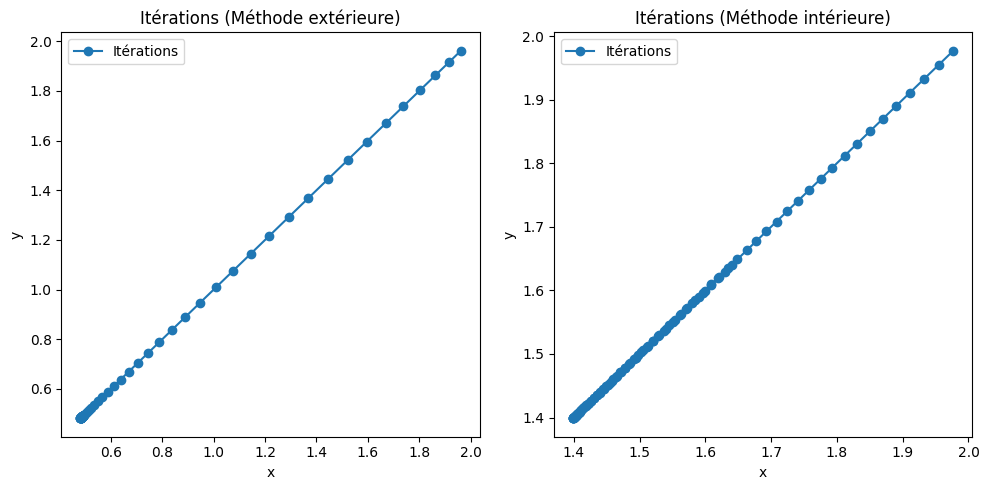

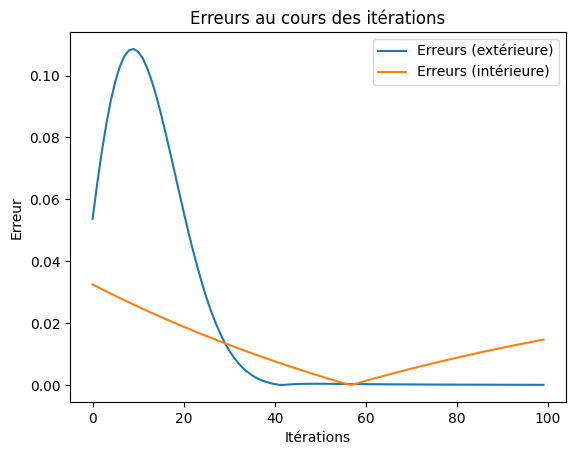

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def penalisation_exterieure(f, penalty, grad_f, grad_penalty, x0, mu_start, mu_increment, tol, max_iter):
    """
    Cette fonction implémente la méthode de pénalisation extérieure pour résoudre un problème d'optimisation avec des contraintes
    en les transformant en un problème sans contrainte. Elle utilise une fonction de pénalisation et augmente progressivement 
    le paramètre de pénalité (mu) à chaque itération pour forcer la solution à respecter les contraintes.
    """
    x = np.array(x0, dtype=float)  # Initialisation du point de départ comme un tableau numpy.
    mu = mu_start  # Initialisation du paramètre de pénalité.
    iterations = []  # Liste pour stocker les points calculés à chaque itération.
    errors = []  # Liste pour stocker les erreurs (différences entre itérations successives).

    for k in range(max_iter):
        grad = grad_f(x) + mu * grad_penalty(x)  # Calcul du gradient de la fonction pénalisée.
        x_next = x - 0.01 * grad  # Mise à jour de la solution avec un pas fixe (0.01).
        
        error = np.linalg.norm(x_next - x)  # Calcul de l'erreur entre la solution actuelle et précédente.
        iterations.append(x_next)  # Stockage de la nouvelle solution.
        errors.append(error)  # Stockage de l'erreur.
        
        if error < tol:  # Critère de convergence basé sur une tolérance.
            break

        x = x_next  # Mise à jour du point courant.
        mu += mu_increment  # Augmentation du paramètre de pénalité.

    return x, iterations, errors  # Retourne la solution finale, les itérations, et les erreurs.

def penalisation_interieure(f, penalty, grad_f, grad_penalty, x0, mu_start, mu_decrement, tol, max_iter):
    """
    Cette fonction implémente la méthode de pénalisation intérieure pour résoudre un problème d'optimisation avec des contraintes.
    Contrairement à la méthode extérieure, le paramètre de pénalité (mu) diminue à chaque itération pour éviter de sortir de
    l'ensemble admissible.
    """
    x = np.array(x0, dtype=float)  # Initialisation du point de départ comme un tableau numpy.
    mu = mu_start  # Initialisation du paramètre de pénalité.
    iterations = []  # Liste pour stocker les points calculés à chaque itération.
    errors = []  # Liste pour stocker les erreurs (différences entre itérations successives).

    for k in range(max_iter):
        grad = grad_f(x) + mu * grad_penalty(x)  # Calcul du gradient de la fonction pénalisée.
        x_next = x - 0.01 * grad  # Mise à jour de la solution avec un pas fixe (0.01).
        
        error = np.linalg.norm(x_next - x)  # Calcul de l'erreur entre la solution actuelle et précédente.
        iterations.append(x_next)  # Stockage de la nouvelle solution.
        errors.append(error)  # Stockage de l'erreur.
        
        if error < tol:  # Critère de convergence basé sur une tolérance.
            break

        x = x_next  # Mise à jour du point courant.
        mu -= mu_decrement  # Réduction du paramètre de pénalité.

    return x, iterations, errors  # Retourne la solution finale, les itérations, et les erreurs.

# Définir les fonctions f et h, et leurs gradients
kappa = 0.6  # kappa > 0.5

def f(x):
    """Fonction objectif de l'optimisation."""
    return x[0]**2 + x[1]**2 - x[0]*x[1]

def penalty_g(x):
    """Fonction de pénalisation extérieure associée à la contrainte g(x)."""
    return (kappa / 2) * (x[0] + x[1] - 1)**2

def grad_f(x):
    """Gradient de la fonction objectif."""
    return np.array([2*x[0] - x[1], 2*x[1] - x[0]])

def grad_penalty_g(x):
    """Gradient de la fonction de pénalisation extérieure."""
    return kappa * (x[0] + x[1] - 1) * np.array([1, 1])

def penalty_h(x):
    """Fonction de pénalisation intérieure associée à la contrainte h(x)."""
    return (kappa / 2) * abs(x[0] + x[1] - 1)

def grad_penalty_h(x):
    """Gradient de la fonction de pénalisation intérieure."""
    return (kappa / 2) * np.sign(x[0] + x[1] - 1) * np.array([1, 1])

# Paramètres initiaux
x0 = [2.0, 2.0]  # Point de départ de l'optimisation.
mu_start = 1.0  # Valeur initiale du paramètre de pénalité.
mu_increment = 0.5  # Incrément de pénalité pour la méthode extérieure.
mu_decrement = 0.1  # Décrément de pénalité pour la méthode intérieure.
tol = 1e-6  # Tolérance pour le critère d'arrêt.
max_iter = 100  # Nombre maximal d'itérations.

# Méthode extérieure
x_ext, iterations_ext, errors_ext = penalisation_exterieure(f, penalty_g, grad_f, grad_penalty_g, x0, mu_start, mu_increment, tol, max_iter)

# Méthode intérieure
x_int, iterations_int, errors_int = penalisation_interieure(f, penalty_h, grad_f, grad_penalty_h, x0, mu_start, mu_decrement, tol, max_iter)

# Affichage des résultats
print("Solution méthode extérieure:", x_ext)
print("Solution méthode intérieure:", x_int)
print("Nombre d'itérations (extérieure):", len(iterations_ext))
print("Nombre d'itérations (intérieure):", len(iterations_int))

# Représentation graphique des itérations
plt.figure(figsize=(10, 5))

# Itérations méthode extérieure
plt.subplot(1, 2, 1)
iterations_ext = np.array(iterations_ext)
plt.plot(iterations_ext[:, 0], iterations_ext[:, 1], '-o', label='Itérations')
plt.title("Itérations (Méthode extérieure)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Itérations méthode intérieure
plt.subplot(1, 2, 2)
iterations_int = np.array(iterations_int)
plt.plot(iterations_int[:, 0], iterations_int[:, 1], '-o', label='Itérations')
plt.title("Itérations (Méthode intérieure)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()
plt.show()

# Affichage des erreurs
plt.figure()
plt.plot(errors_ext, label='Erreurs (extérieure)')
plt.plot(errors_int, label='Erreurs (intérieure)')
plt.title("Erreurs au cours des itérations")
plt.xlabel("Itérations")
plt.ylabel("Erreur")
plt.legend()
plt.show()


In [10]:
import numpy as np

# Paramètres
alpha = 0.1  # Pas de descente pour x et y
tau = 0.1   # Pas de mise à jour pour lambda
epsilon = 10*(-6)  # Critère de convergence
max_iter = 100  # Nombre maximal d'itérations

# Initialisation
x, y = 1, 1  # Variables primales
lambda1, lambda2 = 1, 1  # Multiplicateurs de Lagrange

# Fonction objectif et contraintes
f = lambda x, y: x**2 + 0.5 * y**2
g1 = lambda x, y: x + y - 1
g2 = lambda x, y: x - y - 1

# Gradient de la Lagrangienne
def grad_L(x, y, lambda1, lambda2):
    grad_x = 2 * x + lambda1 + lambda2
    grad_y = y + lambda1 - lambda2
    return grad_x, grad_y

# Initialisation des erreurs
errors = []
for iteration in range(max_iter):
    for iteration1 in range(max_iter):
        # Sauvegarder les anciennes valeurs pour calculer l'erreur
        x_old, y_old = x, y
        # Étape primale : Mise à jour de x et y par descente de gradient
        grad_x, grad_y = grad_L(x, y, lambda1, lambda2)
        x -= alpha * grad_x
        y -= alpha * grad_y
 # Sauvegarder les anciennes valeurs pour calculer l'erreur
    lambda1_old, lambda2_old = lambda1, lambda2
    # Étape duale : Mise à jour des multiplicateurs
    lambda1 = max(0, lambda1 + tau * g1(x, y))
    lambda2 = max(0, lambda2 + tau * g2(x, y))
    error = np.linalg.norm([x - x_old, y - y_old])
    errors.append(error)
    if error < epsilon:
        break
# Affichage des résultats
print(f"Nombre total d'itérations : {iteration + 1}")
print(f"Erreurs lors des itérations : {errors}")
print(f"Solution finale : x = {x:.6f}, y = {y:.6f}")
print(f"Multiplicateurs finaux : lambda1 = {lambda1:.6f}, lambda2 = {lambda2:.6f}")
print(f"Valeur minimale de f : f(x, y) = {f(x, y):.6f}")

Nombre total d'itérations : 100
Erreurs lors des itérations : [2.9512665448183962e-06, 9.461751430369893e-11, 9.687153245705146e-12, 8.622999761079221e-12, 7.691455140366158e-12, 6.872657655543968e-12, 6.1498706212690696e-12, 6.0538711409434044e-12, 1.3646068800534065e-16, 3.62458676654306e-21, 9.627409490882102e-26, 2.557174637414651e-30, 6.792213556959233e-35, 1.8041069361607355e-39, 4.791960396722866e-44, 1.2728117155087752e-48, 3.3807659684423115e-53, 8.979787343337711e-58, 2.3851571355210215e-62, 6.335311008614934e-67, 1.6827472277674552e-71, 4.4696120343713443e-76, 1.1871914811769847e-80, 3.153346648748775e-85, 8.375729816825335e-90, 2.2247110063935748e-94, 5.909143645042584e-99, 1.5695512144002852e-103, 4.168947588018325e-108, 1.1073307982680055e-112, 2.9412255033307147e-117, 7.812306381231232e-122, 2.0750578602392763e-126, 5.511643954063913e-131, 1.4639697359025126e-135, 3.888508411466274e-140, 1.032842229946947e-144, 2.7433734457566152e-149, 7.286783639035683e-154, 1.935471670

In [13]:
import numpy as np

# Paramètres de l'algorithme
alpha = 0.1  # Pas de descente pour résoudre min_X L(X, λ)
tau = 0.1    # Pas pour mettre à jour λ
epsilon = 10**(-6)  # Critère de convergence
max_iter = 1000  # Nombre maximal d'itérations

# Initialisation
x, y = 1.0, 1.0  # Variables primales
lambda1, lambda2 = 1.0, 1.0  # Multiplicateurs de Lagrange

# Fonction objectif et contraintes
f = lambda x, y: x**2 + 0.5 * y**2  # Fonction à minimiser
g1 = lambda x, y: x + y - 1         # Première contrainte
g2 = lambda x, y: x - y - 1         # Deuxième contrainte

# Gradient de la Lagrangienne
def grad_L(x, y, lambda1, lambda2):
    grad_x = 2 * x + lambda1 + lambda2
    grad_y = y + lambda1 - lambda2
    return grad_x, grad_y

# Fonction de mise à jour de X^(n) : descente de gradient
def update_primal(x, y, lambda1, lambda2, alpha):
    grad_x, grad_y = grad_L(x, y, lambda1, lambda2)
    x_new = x - alpha * grad_x
    y_new = y - alpha * grad_y
    return x_new, y_new

# Initialisation des erreurs
errors = []

# Algorithme d'Uzawa
for iteration in range(max_iter):
    # Étape 1 : Résoudre X^(n) = argmin L(X, λ^(n))
    x_old, y_old = x, y
    x, y = update_primal(x, y, lambda1, lambda2, alpha)

    # Étape 2 : Mettre à jour λ^(n+1)
    lambda1 = max(0, lambda1 + tau * g1(x, y))
    lambda2 = max(0, lambda2 + tau * g2(x, y))

    # Calcul de l'erreur
    error = np.linalg.norm([x - x_old, y - y_old, lambda1, lambda2])
    errors.append(error)

    # Vérification du critère d'arrêt
    if error < epsilon:
        break

# Affichage des résultats
print(f"Nombre total d'itérations : {iteration + 1}")
print(f"Erreurs lors des itérations : {errors}")
print(f"Solution finale : x = {x:.6f}, y = {y:.6f}")
print(f"Multiplicateurs finaux : lambda1 = {lambda1:.6f}, lambda2 = {lambda2:.6f}")
print(f"Valeur minimale de f : f(x, y) = {f(x, y):.6f}")


Nombre total d'itérations : 93
Erreurs lors des itérations : [1.4245701105947717, 1.3214371570377457, 1.20069840918692, 1.0702966563739578, 0.9385293339854475, 0.8143582245163421, 0.7011958973707006, 0.5805473410907485, 0.4534370152295075, 0.3238108300226408, 0.19494026481853532, 0.07399057037616304, 0.041132748426211604, 0.039304546673094784, 0.0314850315984456, 0.025229874649813678, 0.02022619275584626, 0.01622367473864446, 0.01302206573351198, 0.010461154472405688, 0.008412762834453429, 0.006774337202757077, 0.005463821289099172, 0.004415554204973089, 0.003576988874244133, 0.002906066961101648, 0.00236911936849484, 0.001939187667451929, 0.0015946828254282531, 0.0013183143183598286, 0.0010962359367667584, 0.0009173649941688757, 0.0007728398063112687, 0.0006555867888816703, 0.000559973833762263, 0.00048153118055831656, 0.0004167250350703215, 0.00036277273285273556, 0.0003174912027924406, 0.0002791727424153884, 0.00024648366074865987, 0.00021838228909286847, 0.0001940533956888256, 0.00

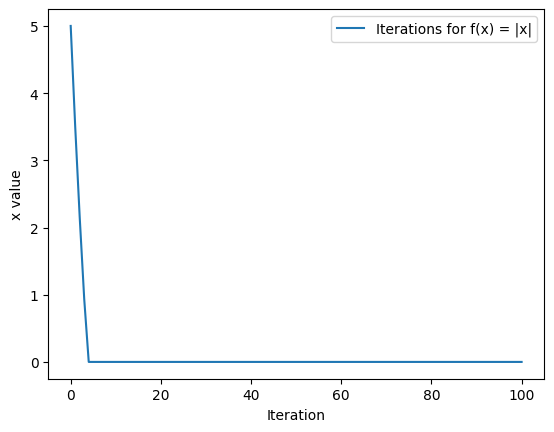

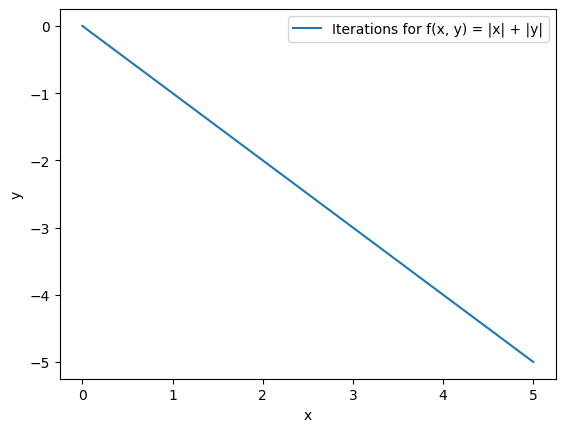

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def prox_abs(x):
    """Proximal operator for |x|"""
    return np.sign(x) * max(0, abs(x) - 1)

def gradient_descent_prox(f, prox, x0, n_iter=100, alpha=0.1):
    """Proximal gradient descent method"""
    x = x0
    x_vals = [x]
    for _ in range(n_iter):
        grad = x  # Gradient of x^2/2 is x
        x = prox(x - alpha * grad)
        x_vals.append(x)
    return np.array(x_vals)

# Example 1: f(x) = |x|
x_vals = gradient_descent_prox(lambda x: abs(x), prox_abs, x0=5.0)
plt.plot(x_vals, label="Iterations for f(x) = |x|")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.legend()
plt.show()

# Example 2: f(x, y) = |x| + |y|
def prox_abs_2d(xy):
    """Proximal operator for |x| + |y|"""
    return np.array([prox_abs(xy[0]), prox_abs(xy[1])])

xy_vals = gradient_descent_prox(lambda xy: abs(xy[0]) + abs(xy[1]), prox_abs_2d, x0=np.array([5.0, -5.0]))
plt.plot(xy_vals[:, 0], xy_vals[:, 1], label="Iterations for f(x, y) = |x| + |y|")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
